In [24]:
import pandas as pd
import numpy as np 
import seaborn 

In [25]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/adult.data'

In [26]:
raw_census_95_data_names = ['age', 'workclass', 'fnlwght', 'education', 'education_num_yr', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'cap_gain', 'cap_loss', 'hours_per_week', 'native_country', 'annual_income']

In [27]:
raw_census_95_data = pd.read_csv(raw_data_url, names = raw_census_95_data_names)

In [28]:
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
raw_census_95_data.describe()

,age,fnlwght,education_num_yr,cap_gain,cap_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
raw_census_95_data.dtypes

age                  int64
workclass           object
fnlwght              int64
education           object
education_num_yr     int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
cap_gain             int64
cap_loss             int64
hours_per_week       int64
native_country      object
annual_income       object
dtype: object

In [31]:
raw_census_95_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwght           32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num_yr  32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  cap_gain          32561 non-null  int64 
 11  cap_loss          32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  annual_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
raw_census_95_data.shape

(32561, 15)

In [33]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html
raw_census_95_data[raw_census_95_data.notna()==True]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
raw_census_95_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [63]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
catagorical_vars = list(raw_census_95_data.select_dtypes(include='object').columns)
del(catagorical_vars[-1])
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [64]:
#https://docs.python.org/3.4/library/stdtypes.html#typesmapping
#https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/
#we see there are a fair amount of missing values in the features denoted by '?'. 
miss_cat_vars = {}
for var in catagorical_vars: 
    k,v = var,raw_census_95_data[var].unique()
    #print(k,v)
    miss_cat_vars.update({k : v})
miss_cat_vars

{'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 'education': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 'marital_status': array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
 'occupation': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 'relationship': array([' Not-in

In [65]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
pd.crosstab(raw_census_95_data.workclass, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
workclass,,
?,1645,191
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
Without-pay,14,0


In [38]:
pd.crosstab(raw_census_95_data.occupation, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


In [39]:
pd.crosstab(raw_census_95_data.native_country, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
native_country,,
?,437,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


In [66]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
raw_census_95_data[(raw_census_95_data.workclass != ' ?') & (raw_census_95_data.occupation == ' ?')]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [67]:
raw_census_95_data[(raw_census_95_data.workclass == ' ?') & (raw_census_95_data.occupation == ' ?')]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [42]:
raw_census_95_data[(raw_census_95_data.workclass == ' ?') & (raw_census_95_data.occupation != ' ?')]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income


In [43]:
raw_census_95_data[(raw_census_95_data.native_country == ' ?')]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [44]:
excluded_data = raw_census_95_data[ ~((raw_census_95_data.workclass != ' ?') & (raw_census_95_data.native_country != ' ?') & (raw_census_95_data.occupation != ' ?'))]
excluded_data.shape

(2399, 15)

In [45]:
print(raw_census_95_data.workclass.mode(),\
raw_census_95_data.native_country.mode(),\
raw_census_95_data.occupation.mode()
     )

0     Private
dtype: object 0     United-States
dtype: object 0     Prof-specialty
dtype: object


In [46]:
#https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.workclass).apply(lambda x: x/x.sum(), axis=1)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
annual_income,,,,,,,,,
<=50K,0.066545,0.023827,0.059709,0.000283,0.717354,0.019984,0.073503,0.038228,0.000566
>50K,0.024359,0.047315,0.078689,0.000000,0.632955,0.079327,0.092335,0.045020,0.000000


In [47]:
for var in catagorical_vars:
    print(pd.crosstab(raw_census_95_data[var], raw_census_95_data.annual_income).apply(lambda x: x/x.sum(), axis = 1)) 

annual_income         <=50K      >50K
workclass                            
 ?                 0.895969  0.104031
 Federal-gov       0.613542  0.386458
 Local-gov         0.705208  0.294792
 Never-worked      1.000000  0.000000
 Private           0.781327  0.218673
 Self-emp-inc      0.442652  0.557348
 Self-emp-not-inc  0.715073  0.284927
 State-gov         0.728043  0.271957
 Without-pay       1.000000  0.000000
annual_income     <=50K      >50K
education                        
 10th          0.933548  0.066452
 11th          0.948936  0.051064
 12th          0.923788  0.076212
 1st-4th       0.964286  0.035714
 5th-6th       0.951952  0.048048
 7th-8th       0.938080  0.061920
 9th           0.947471  0.052529
 Assoc-acdm    0.751640  0.248360
 Assoc-voc     0.738784  0.261216
 Bachelors     0.585247  0.414753
 Doctorate     0.259080  0.740920
 HS-grad       0.840491  0.159509
 Masters       0.443413  0.556587
 Preschool     1.000000  0.000000
 Prof-school   0.265625  0.734375
 Som

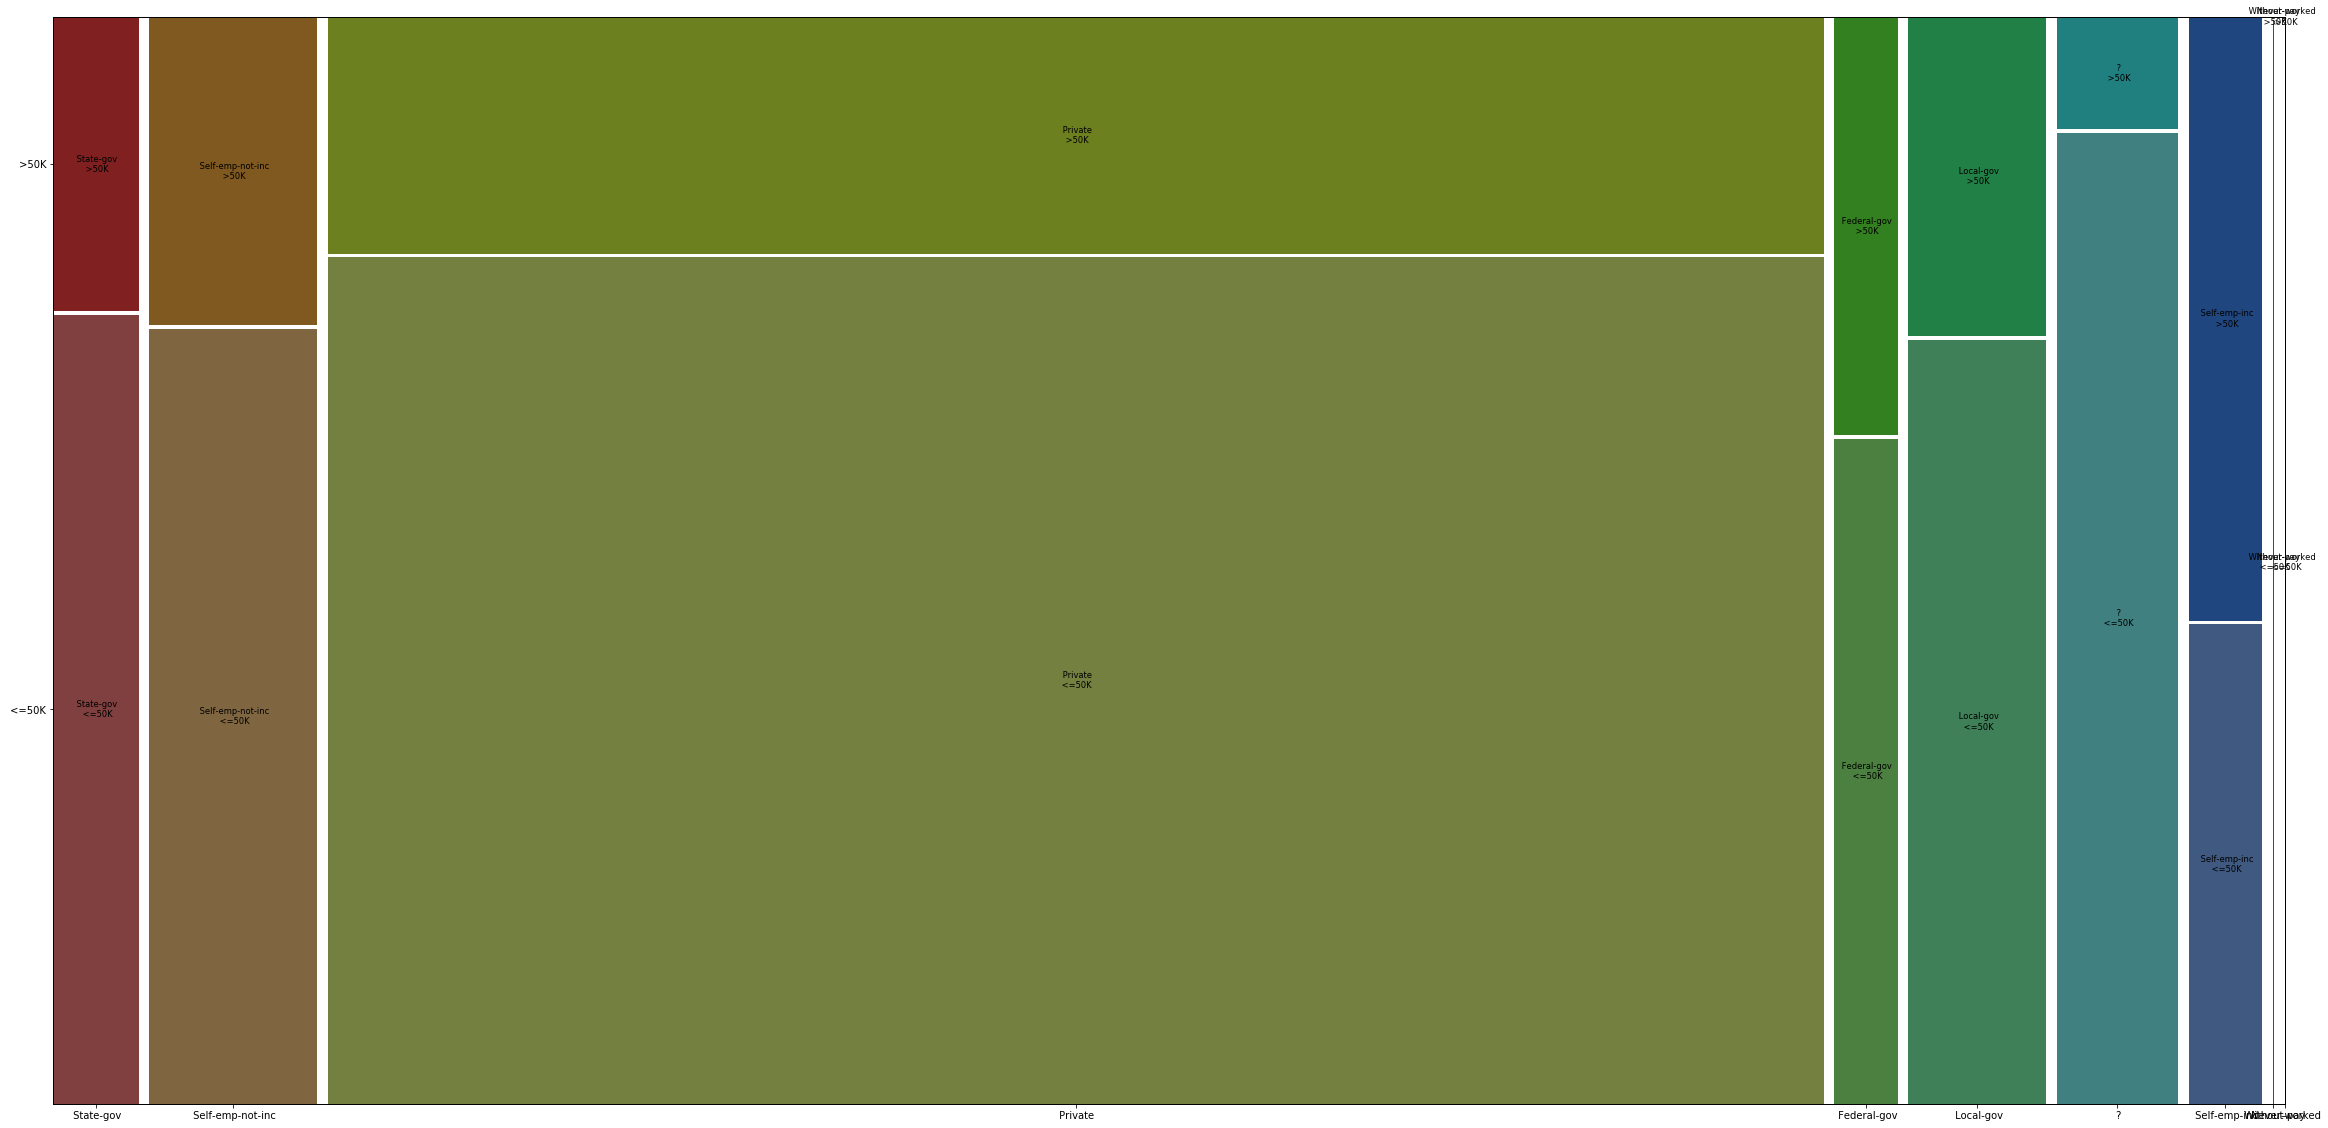

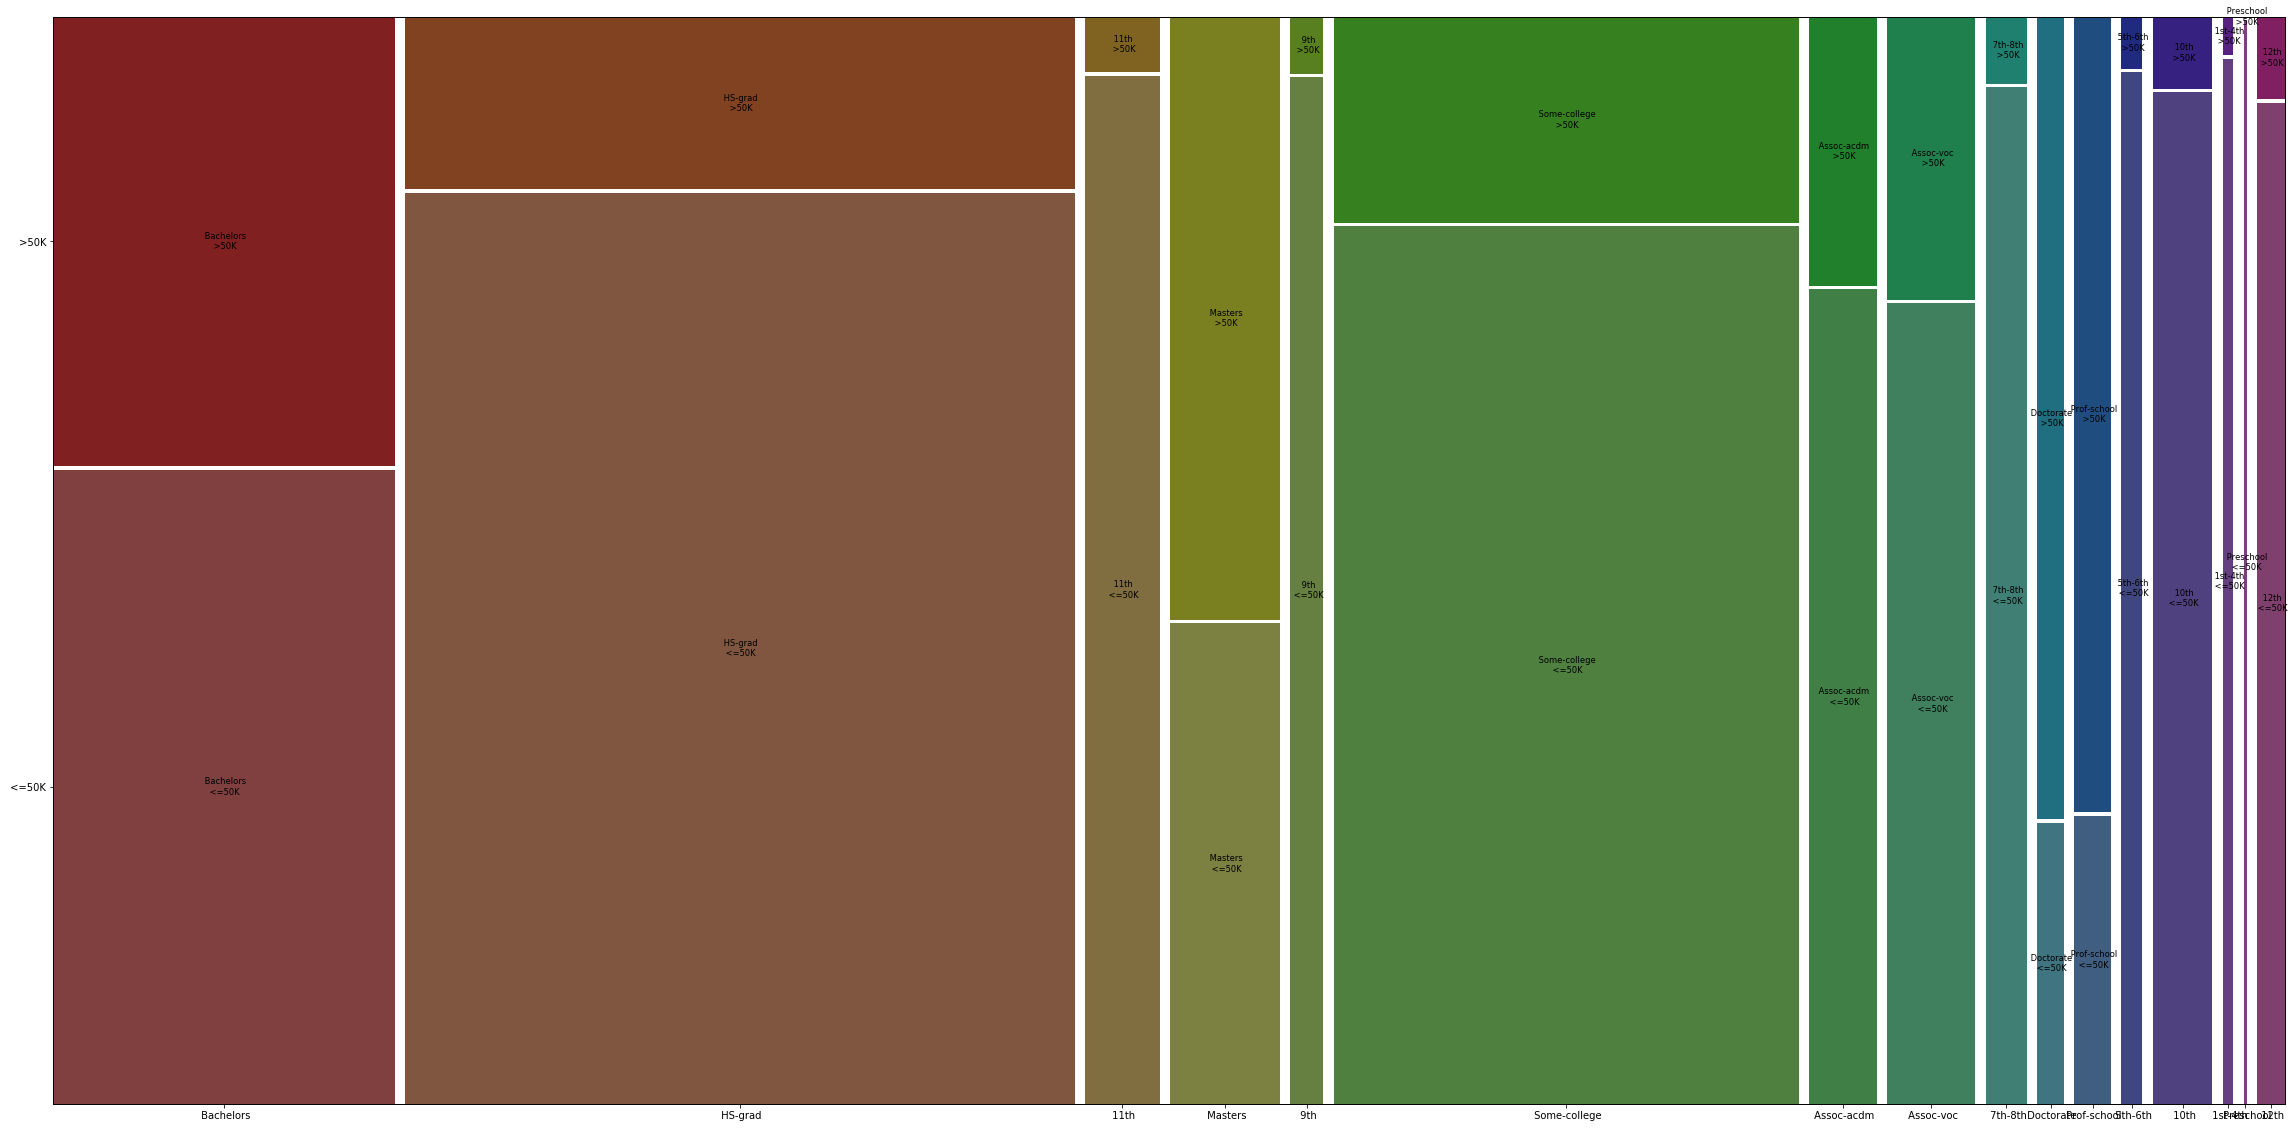

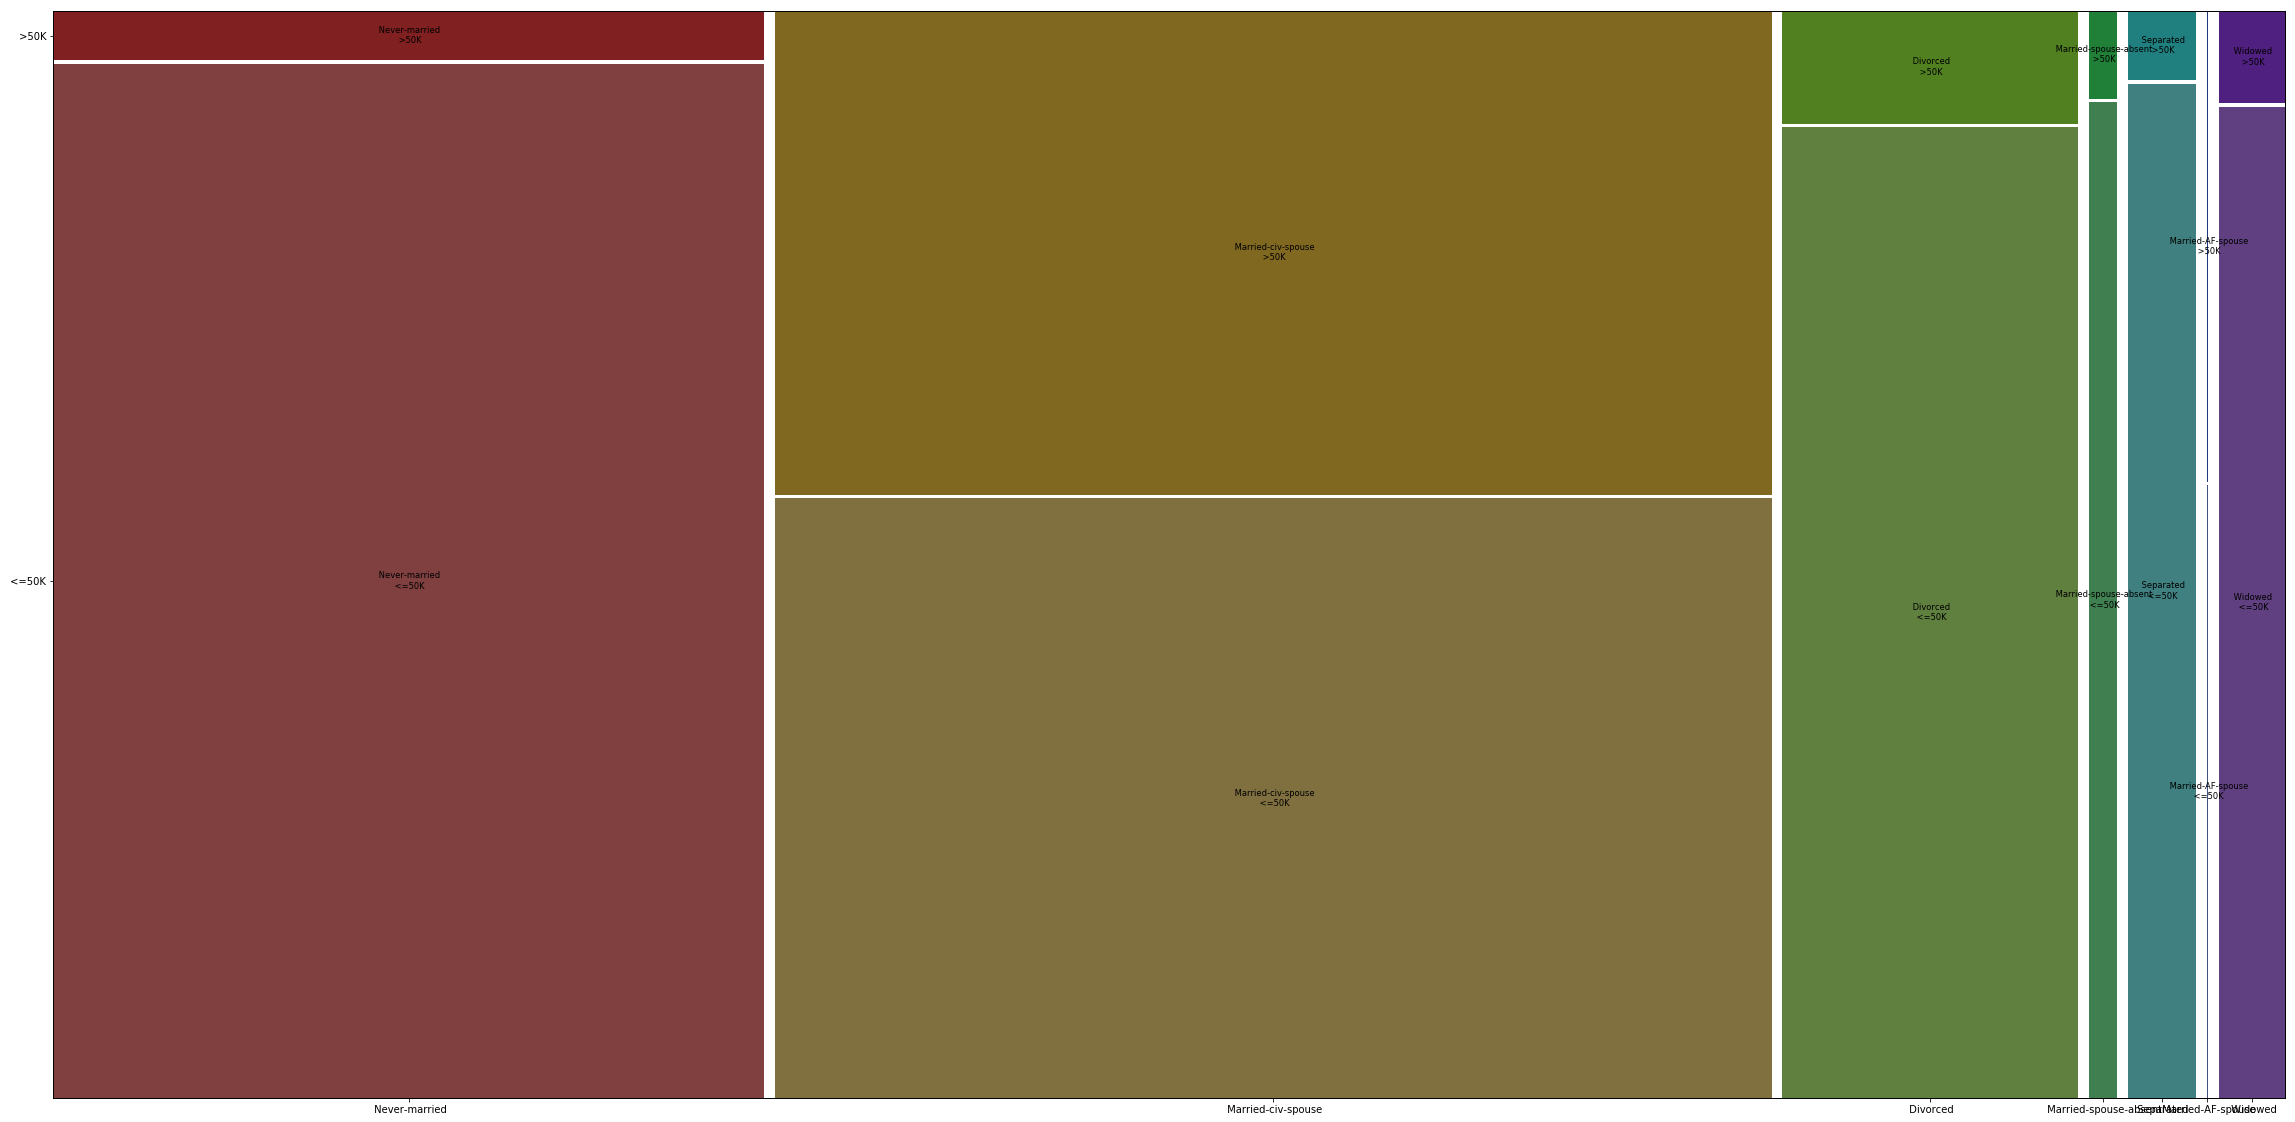

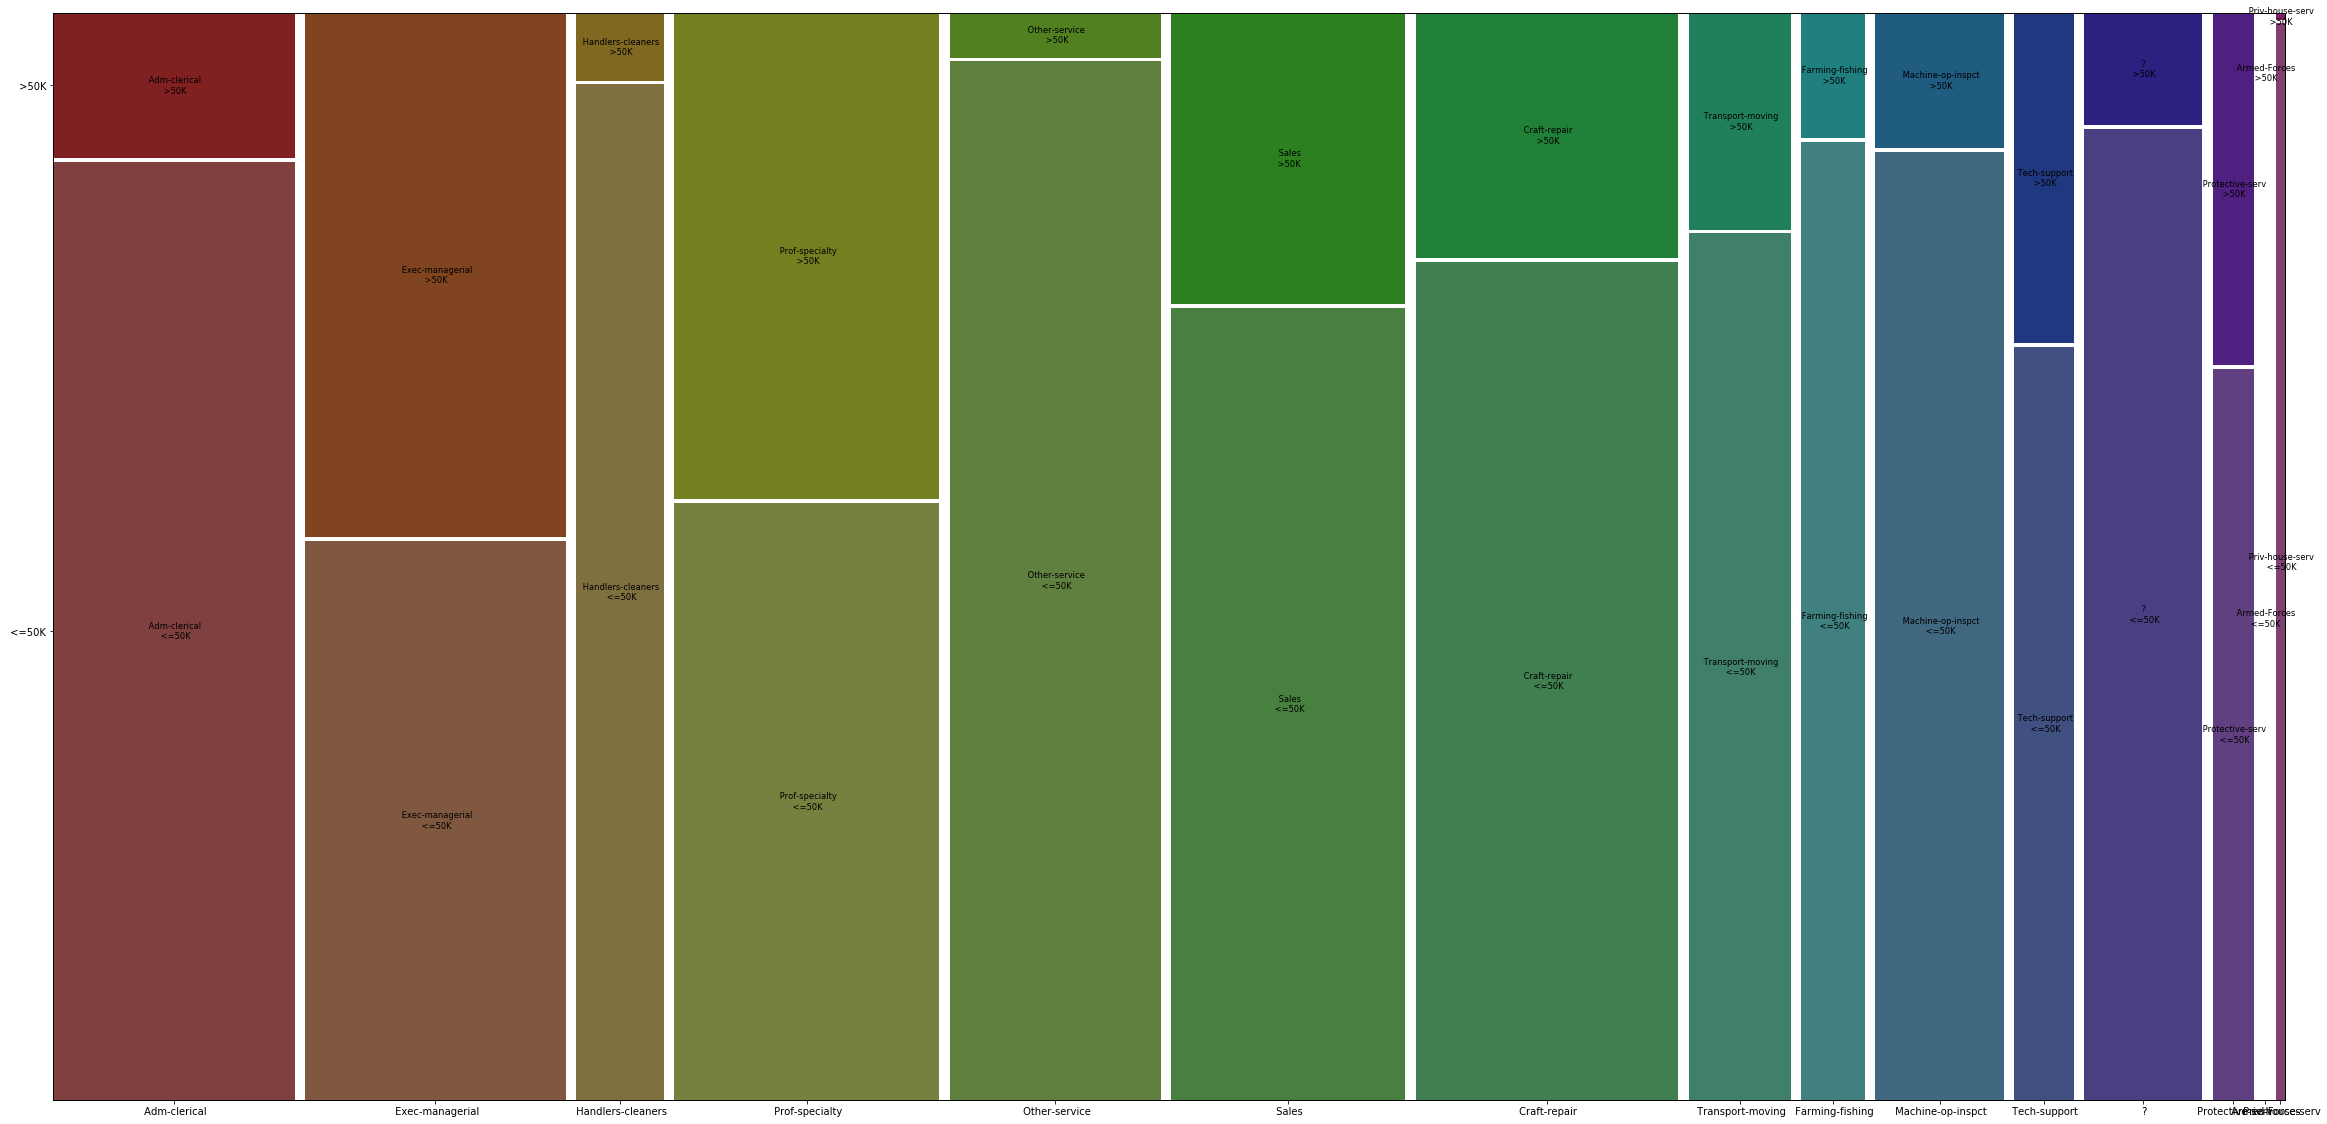

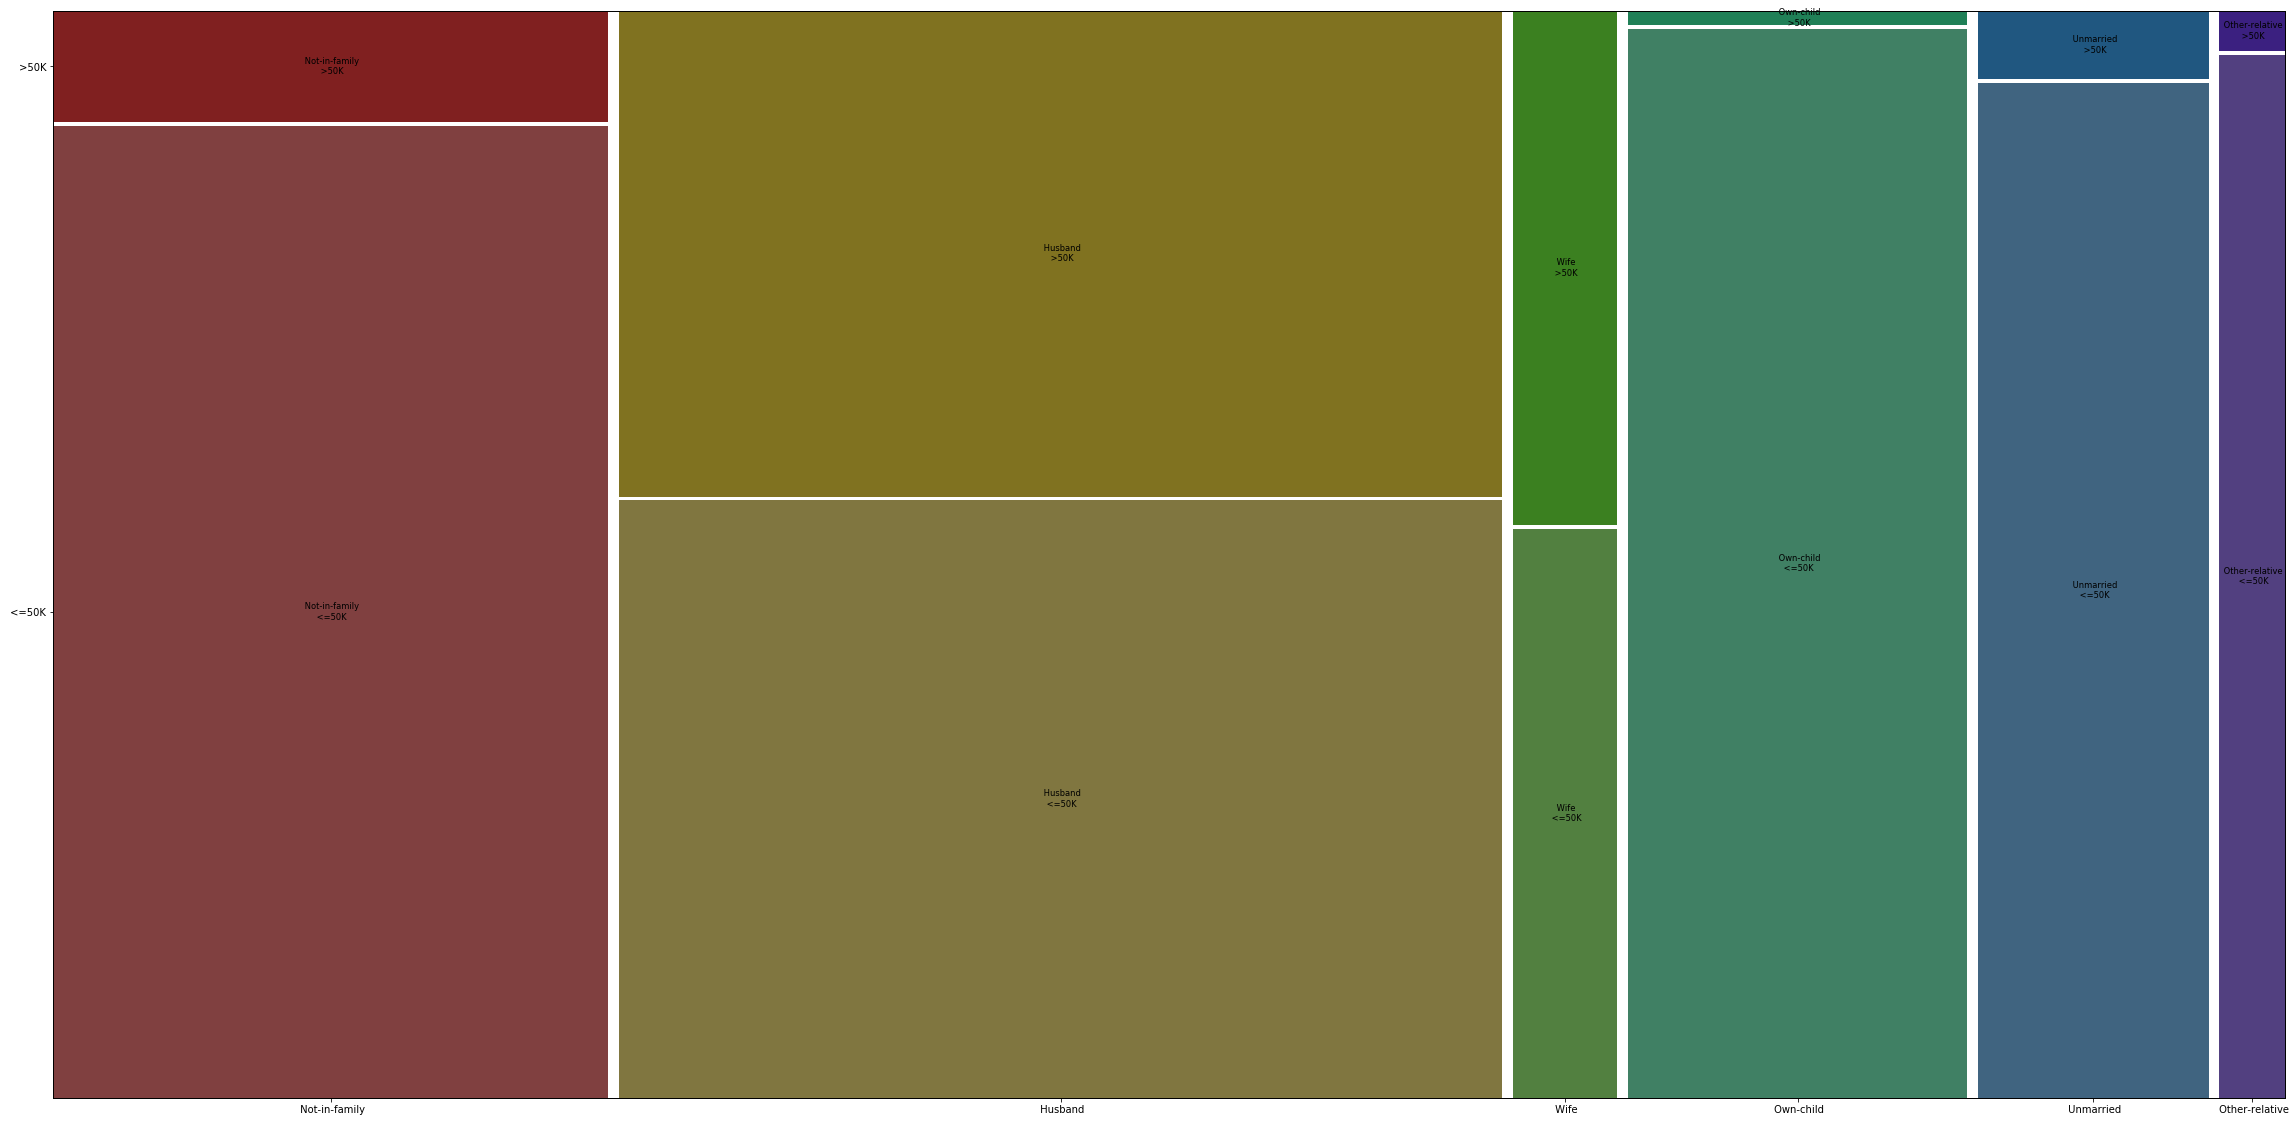

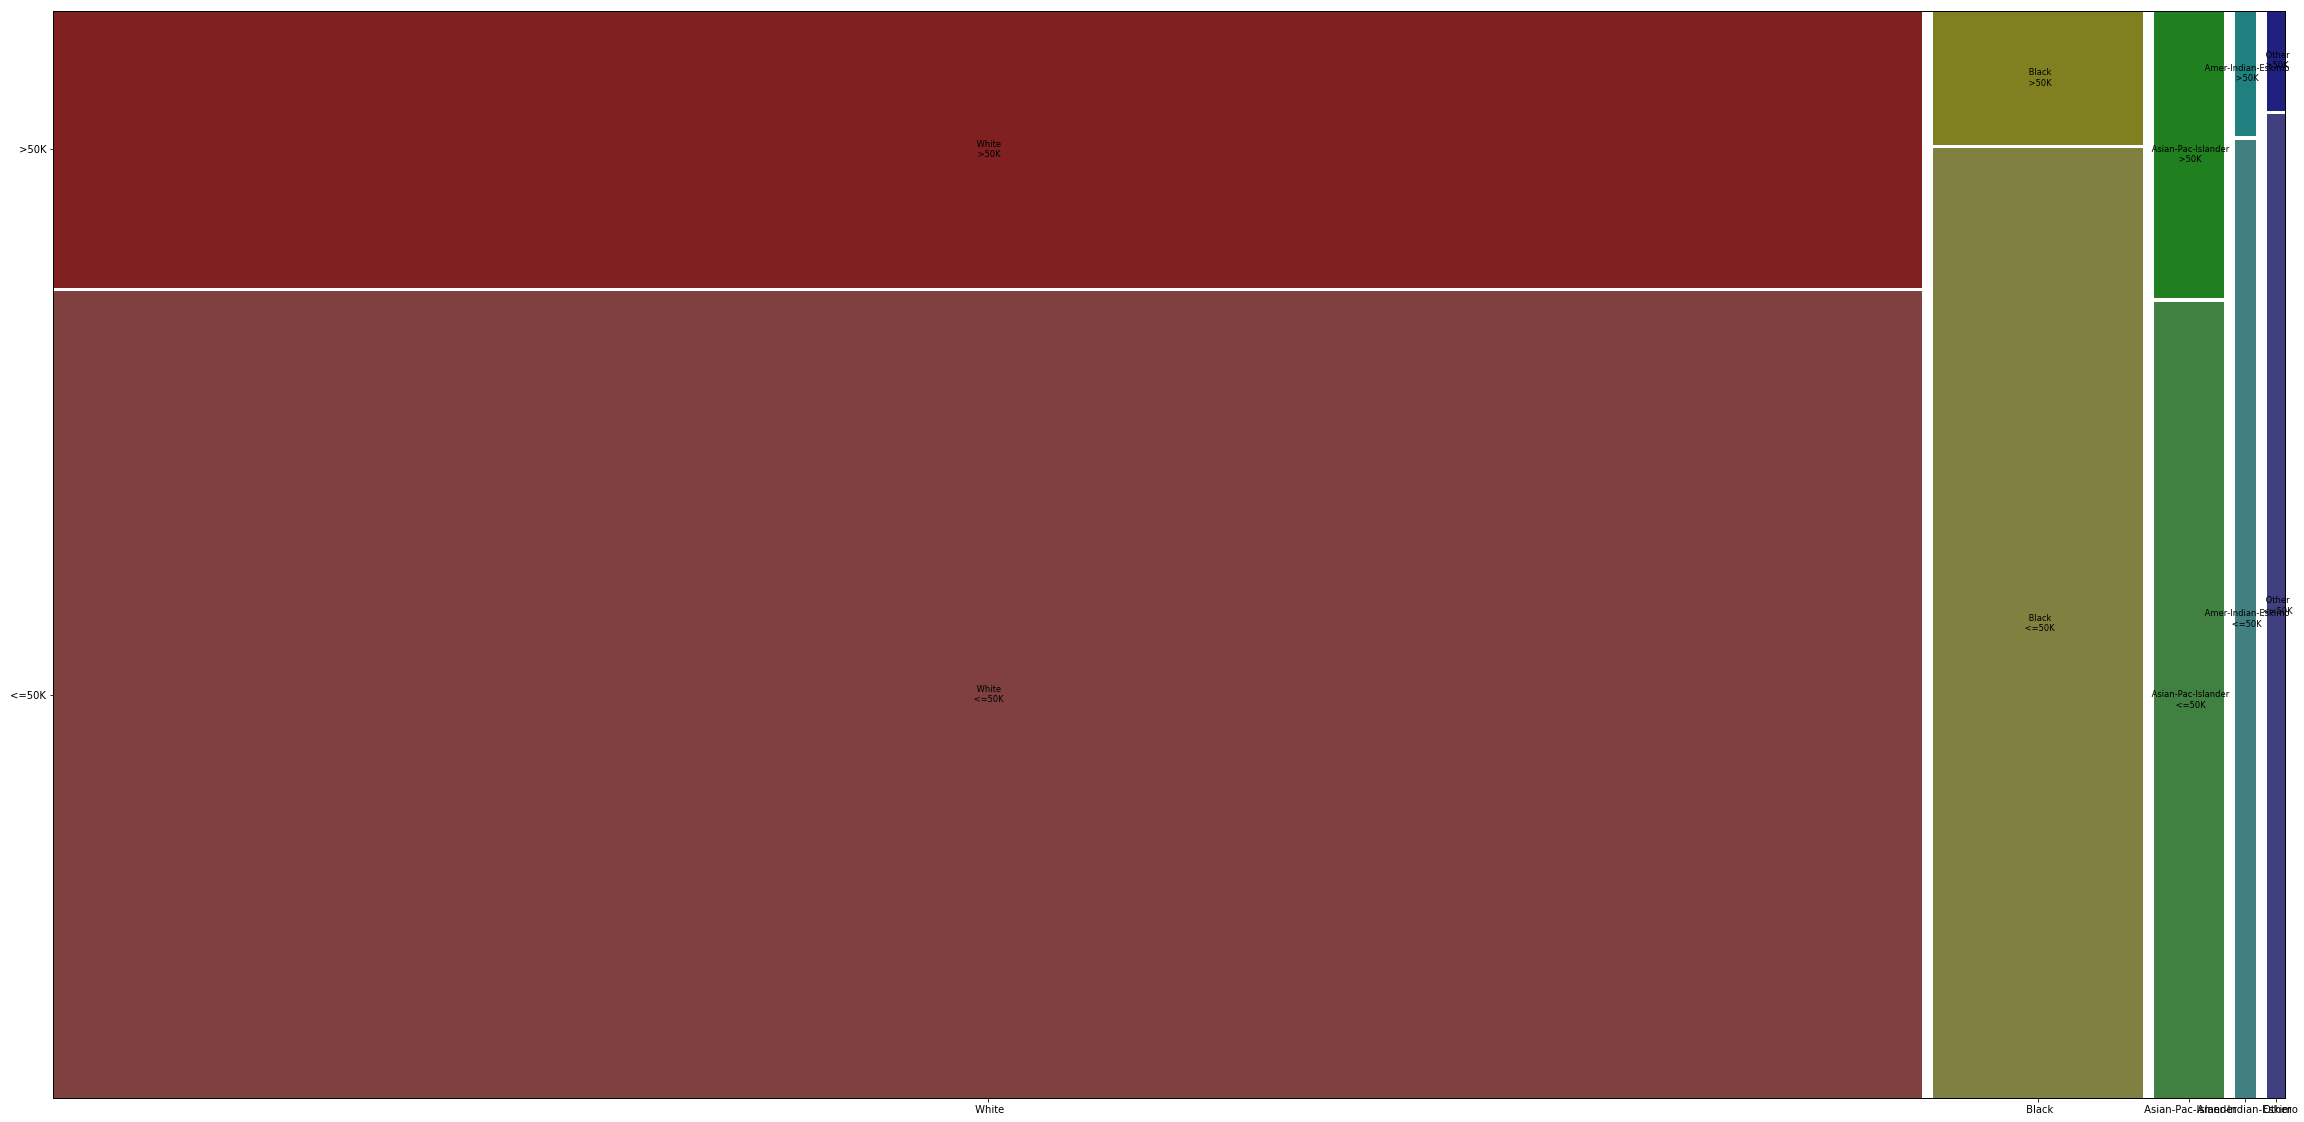

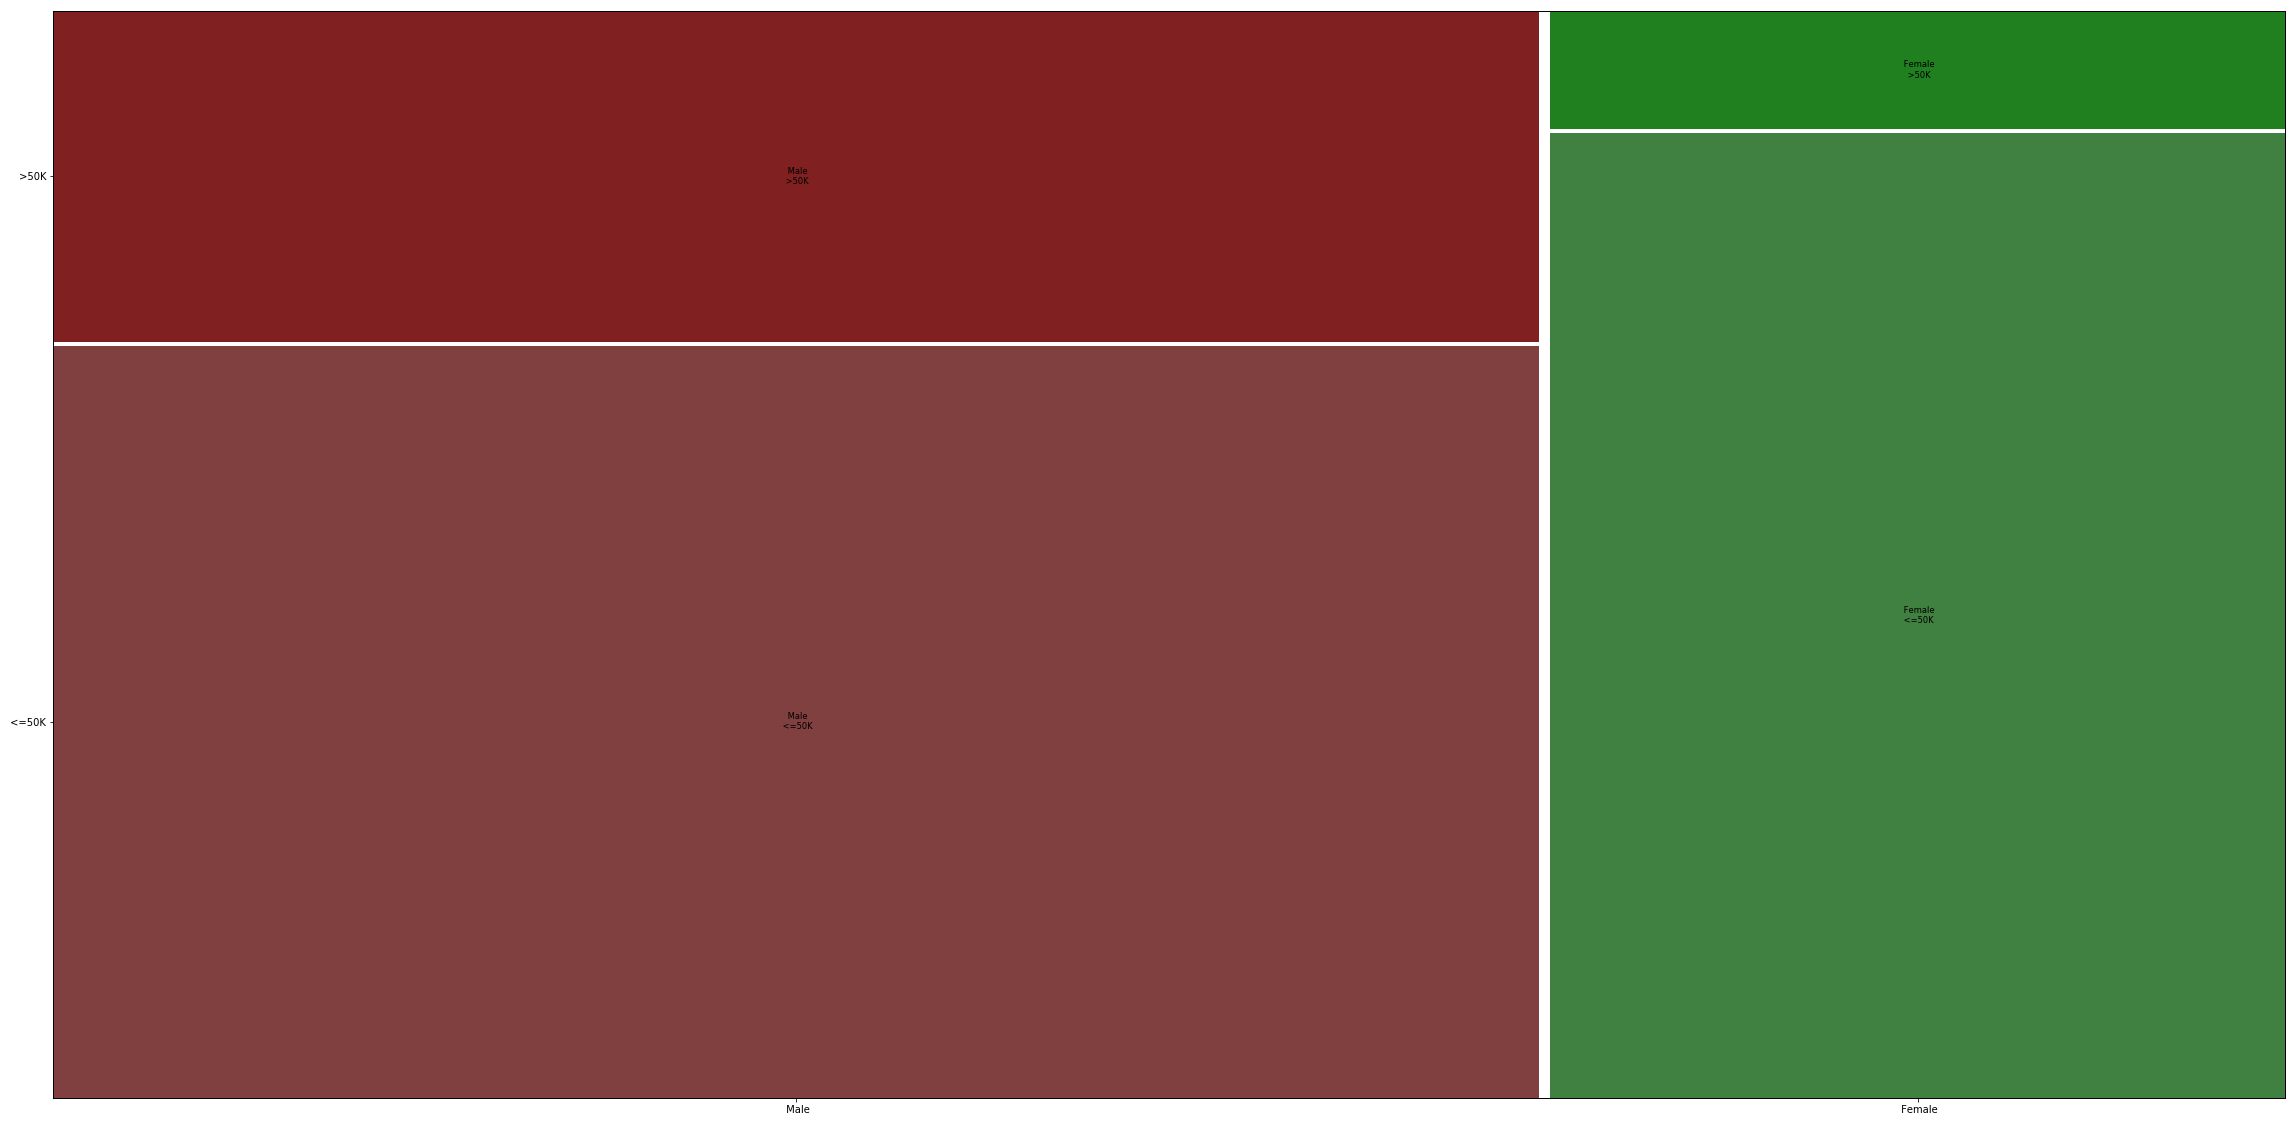

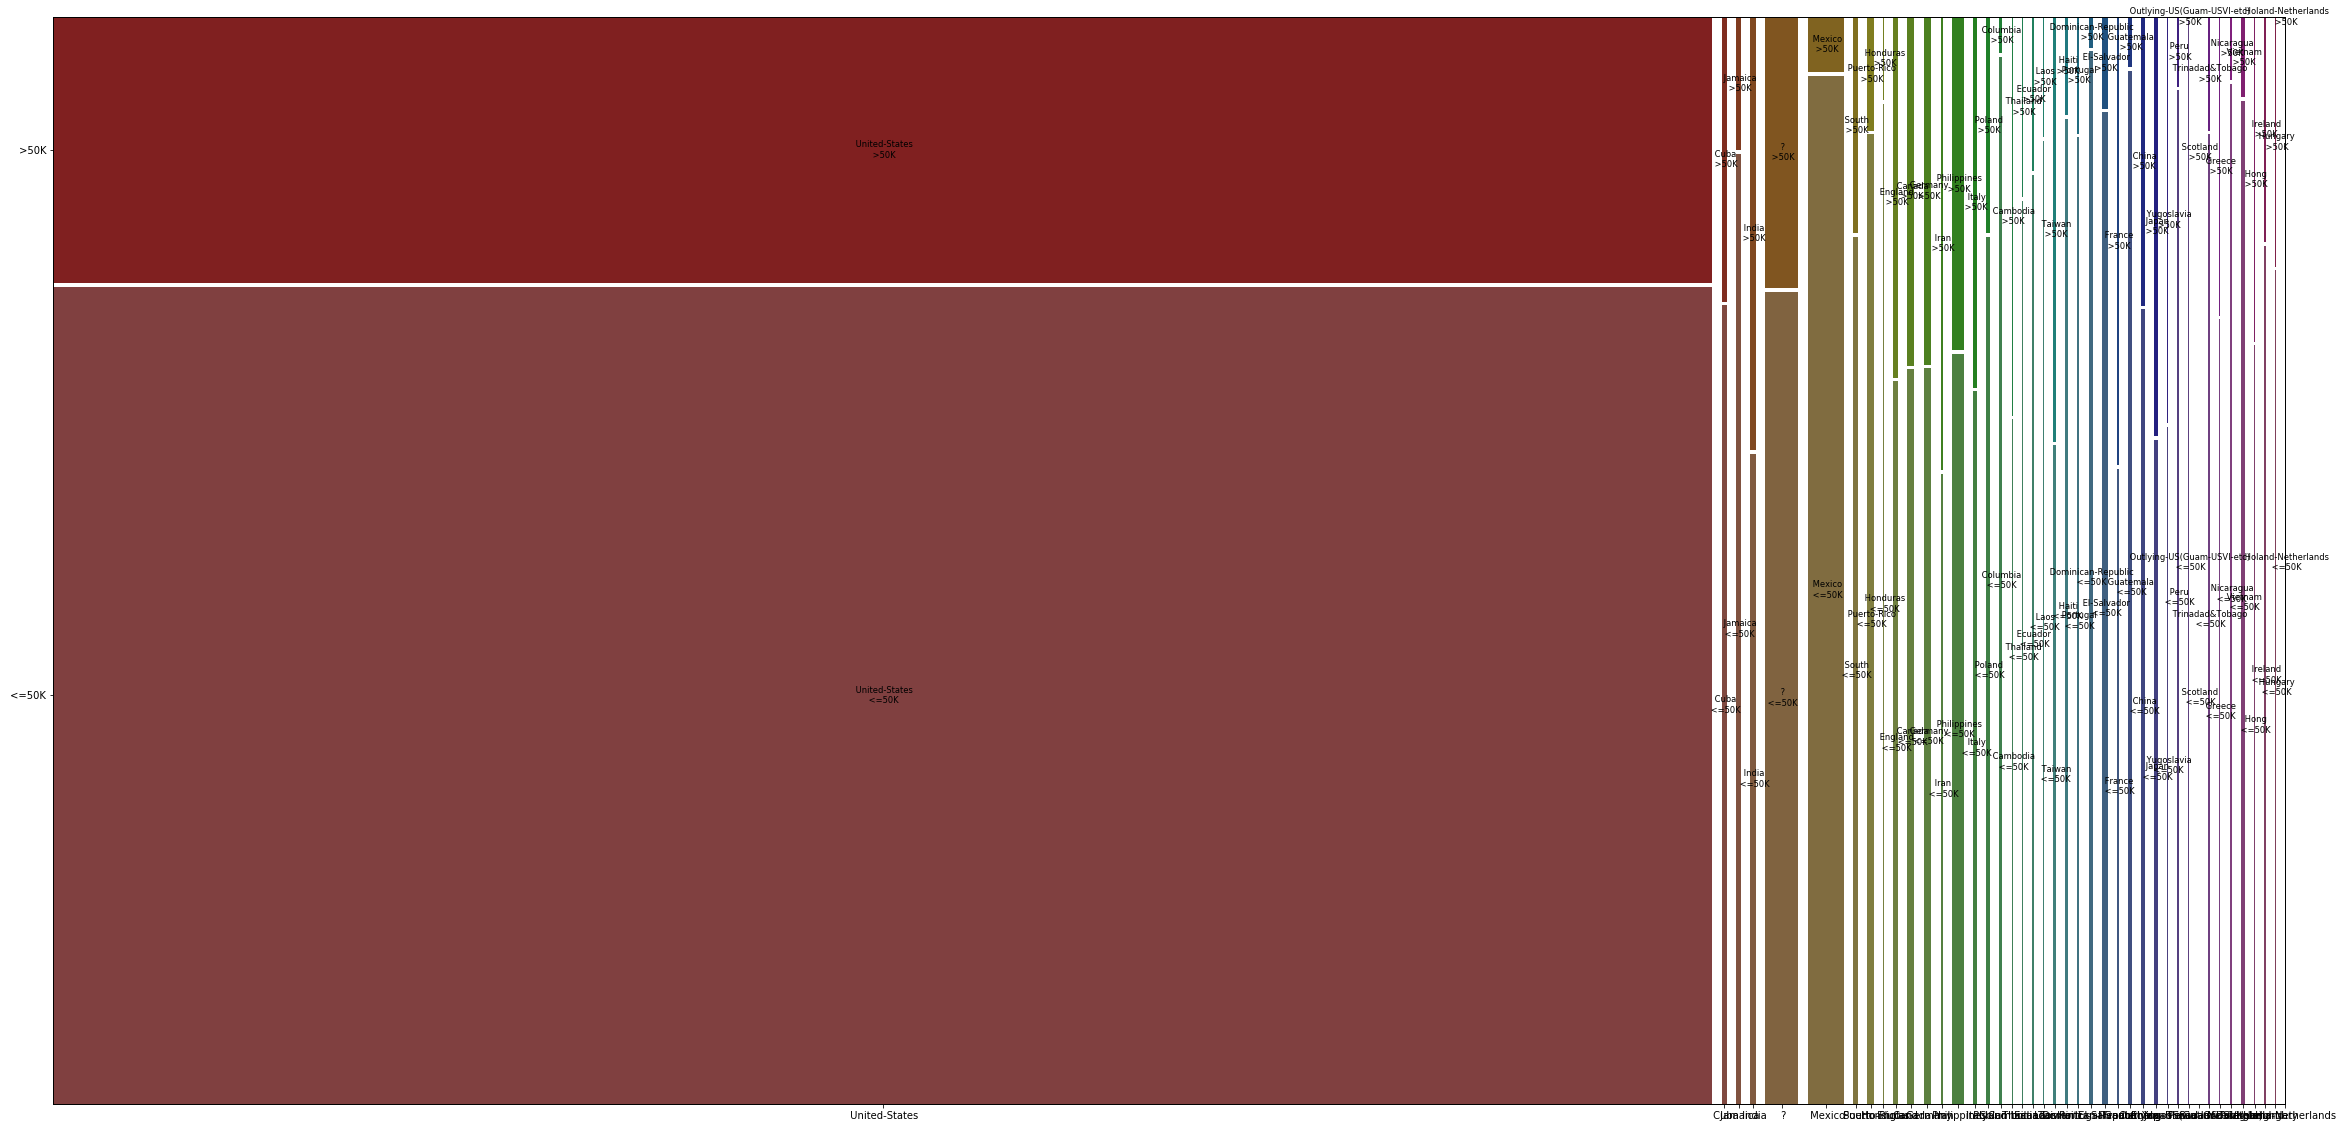

In [92]:
#https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html
#https://stackoverflow.com/questions/28517276/changing-fig-size-with-statsmodel -- cel's answer 
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import matplotlib as mpl


target_var = 'annual_income'
for var in catagorical_vars:
    
    n, m = 40, 20

    with mpl.rc_context():
        mpl.rc("figure", figsize=(n,m))
    
        mosaic(raw_census_95_data,[str(var), target_var], horizontal = True, gap = 0.005)

        plt.show()